<a href="https://colab.research.google.com/github/gourav-prateek-sharma/Capstone-Project-COVER/blob/main/Capstone_Sionna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Sionna if not already installed
try:
    import sionna.rt
except ImportError as e:
    import os
    os.system("pip install sionna-rt")
    import sionna.rt

# Other imports
import matplotlib.pyplot as plt
import numpy as np
from sionna.rt import load_scene, PlanarArray, Transmitter, Receiver, Camera, PathSolver, RadioMapSolver


In [ ]:
import sionna.rt

# Define the path to the updated XML file
xml_file_path = '/content/sample_data/sionna/agiranew.xml'

# Load the scene using the updated XML file
try:
    scene = sionna.rt.load_scene(xml_file_path)
    print("Scene loaded successfully!")
except Exception as e:
    print(f"Error loading scene: {e}")


Scene loaded successfully!


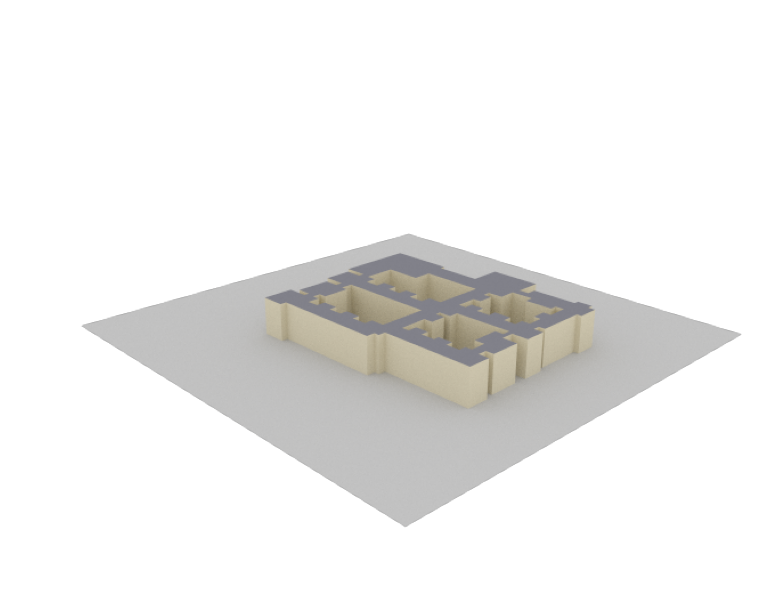

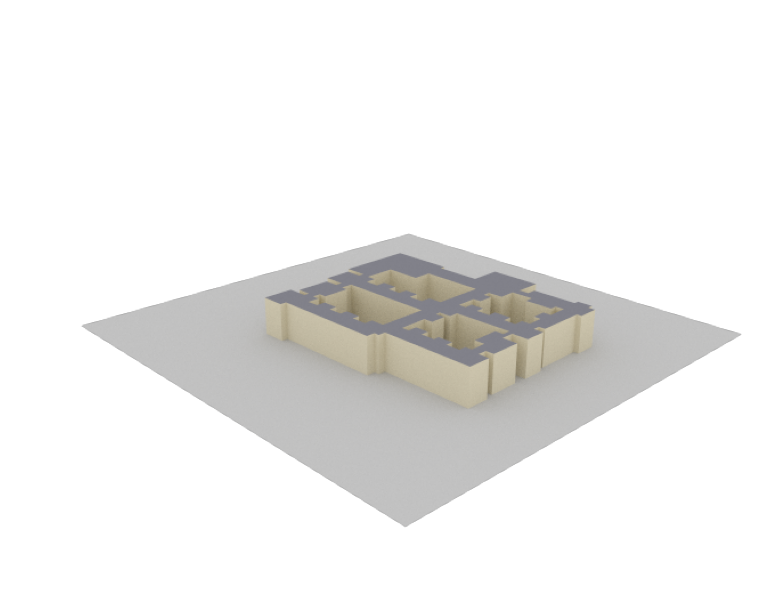

In [ ]:
# Define the camera position and orientation
camera = sionna.rt.Camera(position=[-250, 250, 150], look_at=[-15, 30, 28])

# Render the scene with the camera
scene.render(camera=camera, resolution=[650, 500], num_samples=512)


In [ ]:

scene.objects

{'Plane': <sionna.rt.scene_object.SceneObject at 0x7d08113f22d0>,
 'Agira_Hall-itu_metal': <sionna.rt.scene_object.SceneObject at 0x7d08573f8a10>,
 'Agira_Hall-itu_marble': <sionna.rt.scene_object.SceneObject at 0x7d08113e5910>}

In [ ]:
scene.tx_array = sionna.rt.PlanarArray(
    num_rows=1,
    num_cols=1,
    vertical_spacing=0.5,
    horizontal_spacing=0.5,
    pattern="tr38901",  # Example antenna pattern for transmitters
    polarization="V"  # Vertical polarization for transmitters
)

# Configure antenna array for all receivers
scene.rx_array = sionna.rt.PlanarArray(
    num_rows=1,
    num_cols=1,
    vertical_spacing=0.5,
    horizontal_spacing=0.5,
    pattern="dipole",  # Example antenna pattern for receivers
    polarization="cross"  # Cross-polarized for receivers
)

# Create multiple transmitters and add them to the scene
transmitters = []
for i in range(3):  # Example: Creating 3 transmitters
    tx = sionna.rt.Transmitter(name=f"tx_{i+1}",  # Ensures unique name for each transmitter
                               position=[8.5 + i*10, 21 + i*10, 27],  # Adjust position for each transmitter
                               display_radius=2)

    # Add the transmitter to the scene
    scene.add(tx)
    transmitters.append(tx)

    # Print the position and name of each transmitter
    print(f"Transmitter Name: {tx.name}, Position: {tx.position}")

# Create multiple receivers and add them to the scene
receivers = []
for i in range(3):  # Example: Creating 3 receivers
    rx = sionna.rt.Receiver(name=f"rx_{i+1}",  # Ensures unique name for each receiver
                            position=[45 + i*10, 90 + i*10, 1.5],  # Adjust position for each receiver
                            display_radius=2)

    # Add the receiver to the scene
    scene.add(rx)
    receivers.append(rx)

    # Print the position and name of each receiver
    print(f"Receiver Name: {rx.name}, Position: {rx.position}")

# Optionally, make each transmitter point at each receiver (if you want directional communication)
for tx, rx in zip(transmitters, receivers):
    tx.look_at(rx)

Transmitter Name: tx_1, Position: [[8.5, 21, 27]]
Transmitter Name: tx_2, Position: [[18.5, 31, 27]]
Transmitter Name: tx_3, Position: [[28.5, 41, 27]]
Receiver Name: rx_1, Position: [[45, 90, 1.5]]
Receiver Name: rx_2, Position: [[55, 100, 1.5]]
Receiver Name: rx_3, Position: [[65, 110, 1.5]]


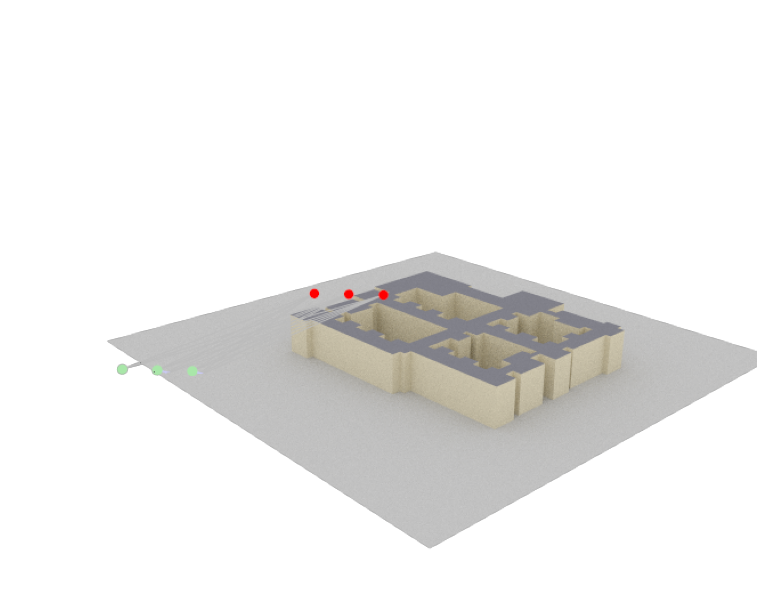

In [ ]:
# Step 1: Instantiate the PathSolver to compute the propagation paths
path_solver = sionna.rt.PathSolver()

# Step 2: Compute propagation paths
# This will compute paths between transmitters and receivers
paths = path_solver(scene=scene,
                    max_depth=5,  # Maximum depth of path tracing
                    los=True,  # Line-of-sight propagation
                    specular_reflection=True,  # Enable specular reflection
                    diffuse_reflection=False,  # Disable diffuse reflection
                    refraction=True,  # Enable refraction
                    synthetic_array=False,  # Do not use synthetic array
                    seed=42)  # Random seed for reproducibility

# Step 3: Visualize the computed paths
# Choose whether to render or preview the scene
no_preview = True  # Set to False to preview the scene in Colab

# Define the camera for rendering
camera = sionna.rt.Camera(position=[-250, 250, 150], look_at=[8.5, 21, 27])

# Render the scene with paths (ray tracing lines)
if no_preview:
    scene.render(camera=camera, paths=paths, clip_at=20)  # Render paths
else:
    scene.preview(paths=paths, clip_at=20)  # Preview paths in Colab

# Step 4: Optionally, save and show the rendered scene
if not no_preview:
    img = plt.imread('/content/scene.png')  # Path to the saved rendered image
    plt.imshow(img)
    plt.axis('off')  # Hide axes for a clean view
    plt.show()

deepseek

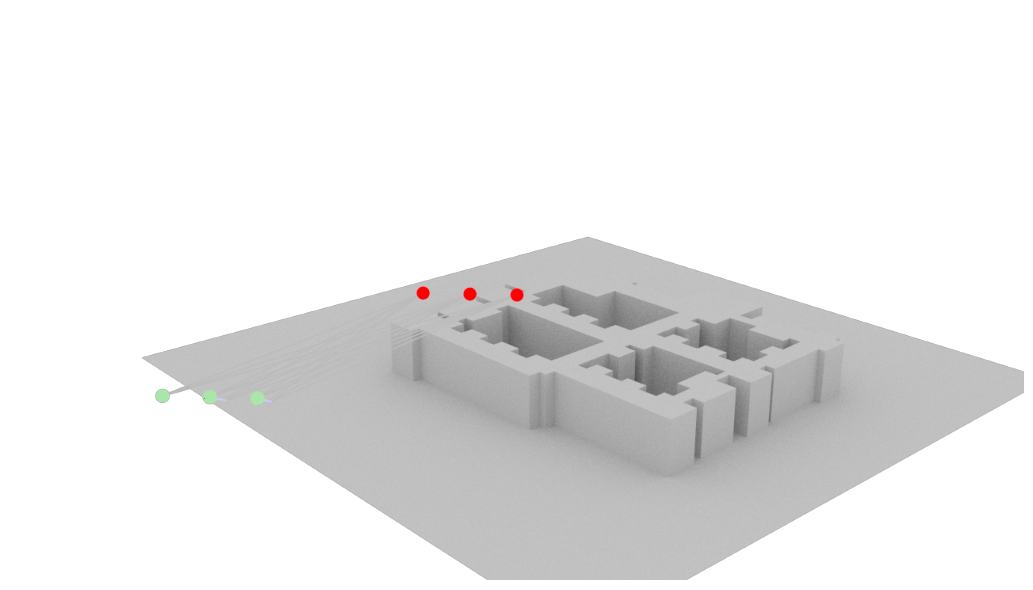

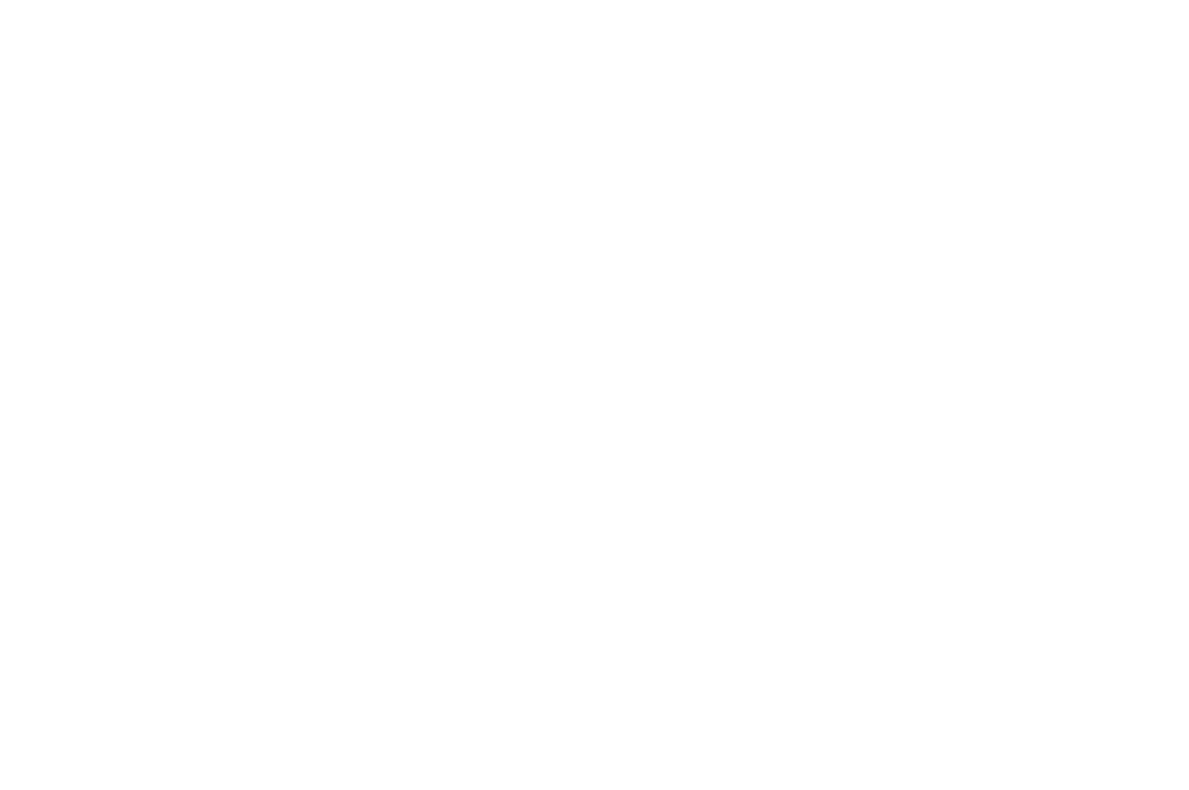

In [ ]:
# 1. Configure the Paths object first
paths.line_width = 3.0  # Make paths thicker (default is 1.0)
paths.color = [1.0, 0.0, 0.0]  # Red color (RGB values 0-1)

# For different path types (if needed):
paths.los_color = [0.0, 1.0, 0.0]  # Green for line-of-sight
paths.reflection_color = [1.0, 0.0, 0.0]  # Red for reflections
paths.refraction_color = [0.0, 0.0, 1.0]  # Blue for refractions

# 2. Configure the camera properly
camera = sionna.rt.Camera(
    position=[-250, 250, 150],
    look_at=[8.5, 21, 27]
)

# 3. Render with proper settings
scene.render(
    camera=camera,
    paths=paths,
    resolution=[1280, 720],  # Higher resolution
    clip_at=20,

)

# 4. Adjust visualization after rendering


# Enhance contrast programmatically if needed
plt.figure(figsize=(12, 8))

plt.axis('off')

# Manually adjust contrast if paths aren't visible enough
# This works when the background is too similar to path colors
plt.gca().set_facecolor('black')  # Set plot background to black
plt.tight_layout()
plt.show()